# クロス集計表の分析

In [1]:
# クロス集計表分析
# データ出典 https://www.kaggle.com/vijayashreer/food-preferences
# ブログ掲載 https://datapowernow.hatenablog.com/entry/2020/12/29/111042
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family']='MS Gothic'
from scipy.stats import chi2_contingency

In [2]:
# クラメールのV（修正版）の計算
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
    uses correction from Bergsma and Wicher,
    Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [3]:
# データ準備（年齢はカテゴリー化）
df1 = pd.read_csv('Food_Preference.csv')
func_age = lambda x:'age0-19' if x<20 else ('age20-29' if x<30 else \
('age30-39' if x<40 else ('age40-49' if x<50 else 'age50over')))
df2 = df1.assign(AgeGrp=df1['Age'].apply(func_age))
df2.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert,AgeGrp
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe,age20-29
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes,age20-29
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe,age30-39
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe,age20-29
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe,age20-29


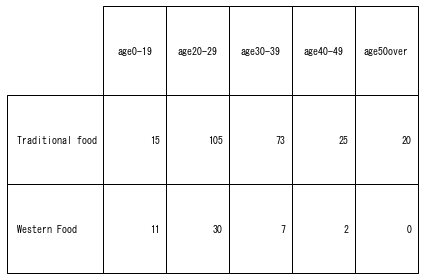

chi2=23.703, pval=9.162e-05, dof=4
cramersV=0.262


In [4]:
# クロス集計表と統計量の表示
dfcrs=pd.crosstab(df2['Food'],df2['AgeGrp'])
fig=plt.figure()
ax=fig.add_subplot(111)
ax.axis('off')
tbl = ax.table(cellText=dfcrs.values,bbox=[0,0,1,1],colLabels=dfcrs.columns,\
rowLabels=dfcrs.index)
plt.tight_layout()
plt.show()
chi2, pval, dof, expctd = chi2_contingency(dfcrs,correction=False)
print('chi2={:.3f}, pval={:.3e}, dof={}'.format(chi2,pval,dof))
print('cramersV={:.3f}'.format(cramers_corrected_stat(dfcrs)))